In [27]:

import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")


In [28]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [29]:
df.shape

(1453, 15)

In [30]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [31]:
# assuming mcdonalds is a pandas dataframe
MD_x = df.iloc[:, 0:11].values

MD_x = (MD_x == "Yes").astype(int)

# round to 2 decimal places
result = np.round(np.mean(MD_x, axis=0), 2)

In [32]:
result

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [33]:
from sklearn.decomposition import PCA

# assuming MD_x is the matrix of binary data from the previous question
MD_pca = PCA()
MD_pca.fit(MD_x)

# print summary statistics
print(MD_pca.explained_variance_ratio_)
print(MD_pca.components_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03

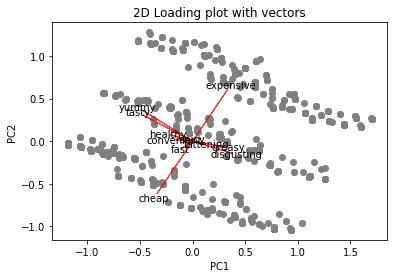

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# THESE CODES WRITTEN BY Abhishek Anand


# # assuming MD_pca is the PCA object from the previous question                                         
loadings = MD_pca.components_[:2, :]
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c='grey')
for i, v in enumerate(df.columns[:11]):
    plt.arrow(0, 0, loadings[0,i], loadings[1,i], color='red', alpha=0.8)
    plt.text(loadings[0,i]* 1.1, loadings[1,i] * 1.1, v, color='black', ha='center', va='center')
 
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()